In [16]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

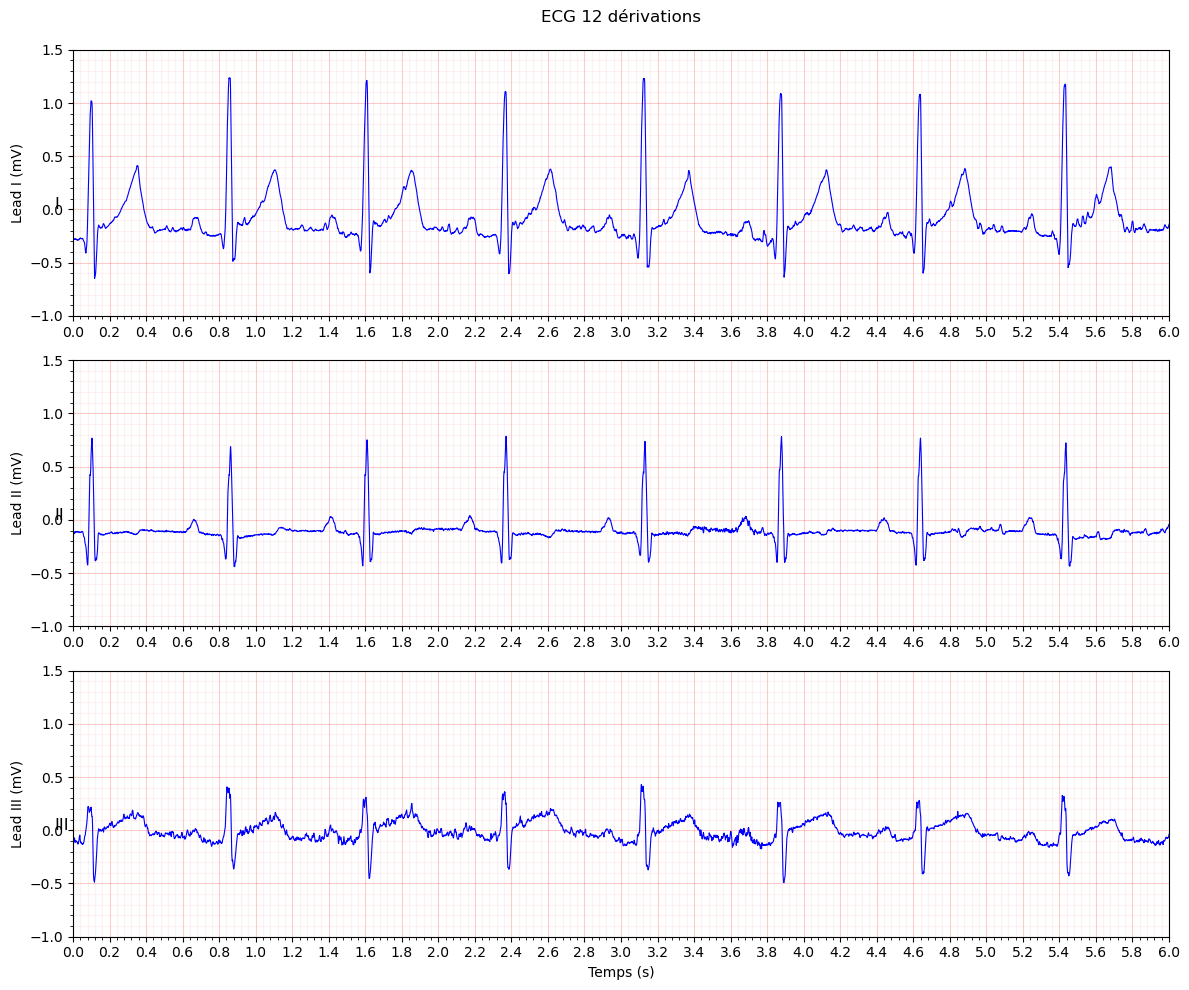

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# --- Chargement du fichier ECG ---
data = np.loadtxt('ECGu.txt')
ECGs = [data[:, i] * 0.001024 for i in range(3)]  # Conversion en mV (Lead I, II, III)

# --- Création du vecteur temps ---
fs = 1000  # Fréquence d'échantillonnage
t = np.arange(len(ECGs[0])) / fs

# --- Configuration du style global ---
plt.style.use('default')
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# --- Paramètres pour chaque lead ---
lead_labels = ["I", "II", "III"]
ylabels = ["Lead I (mV)", "Lead II (mV)", "Lead III (mV)"]

# --- Boucle sur chaque axe/lead ---
for i, ax in enumerate(axes):
    # Grille (papier ECG)
    ax.grid(True, which='major', color='red', linestyle='-', alpha=0.2)
    ax.grid(True, which='minor', color='lightcoral', linestyle='-', alpha=0.1)
    ax.minorticks_on()
    ax.set_xticks(np.arange(0, 7, 0.2))      # Grands carreaux (0.20 s)
    ax.set_xticks(np.arange(0, 7, 0.04), minor=True)  # Petits carreaux (0.04 s)
    ax.set_yticks(np.arange(-1, 1.6, 0.5))   # Grands carreaux (0.5 mV)
    ax.set_yticks(np.arange(-1, 1.6, 0.1), minor=True)  # Petits carreaux (0.1 mV)

    # Tracé du signal
    ax.plot(t, ECGs[i], 'b-', linewidth=0.8)
    ax.set_ylabel(ylabels[i])
    ax.set_ylim(-1, 1.5)
    ax.set_xlim(0, 6)
    ax.text(-0.1, 0, lead_labels[i], fontsize=12)

    # Titre seulement sur le premier
    if i == 0:
        ax.set_title("ECG 12 dérivations", pad=20)
    # Légende de l'axe X seulement sur le dernier
    if i == len(axes) - 1:
        ax.set_xlabel("Temps (s)")

plt.tight_layout()
plt.show()
